# Geospatial Analysis Techniques

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import random
from scipy import stats
import os
from pathlib import Path
import importlib
import inspect
import random
import plotly.graph_objects as go

In [2]:
'''Module imports if needed'''

#geospatial_functions_path  = Path('C:/Users/Jericho/Documents/csi_research/csi-research')
#os.chdir(geospatial_functions_path)
#import geospatial_functions

'''
Check if Getis() exists; if so, force re-import, else, import. 
Used this so the geospatial_functions.py script can be edited and then reimported
'''
#try:
#    inspect.getsource(getis)
#    importlib.reload(geospatial_functions)
#except:
#    import geospatial_functions

#geospatial_functions_path  = Path('C:/Users/Jericho/Documents/csi_research/family-geog/scripts-notebooks')
#os.chdir(geospatial_functions_path)
#from tus import get_summary_data_with_geom

#data_path = Path('C:/Users/Jericho/Documents/csi_research/Dissertation')
#os.chdir(data_path)
pass

# Getis Ord Local G

### Create Dummy Data

In [3]:
nodes = []
values = []
adj = []

letters = ['A','B','C','D','E','F','G','H','I','J']
numbers = ['1','2','3','4','5']
b1 = ['B2','C2','D2','B3','C3','D3','B4','C4','D4']
b2 = ['G2','H2','I2','G3','H3','I3','G4','H4','I4']

for i in letters:
    for j in numbers:
        nodes.append(i+j)

for i in nodes:
    if i in b1:
        values.append(1)
    elif i in b2:
        values.append(3)
    else:
        values.append(2)

for i in nodes:
    row = []
    for j in nodes:
        if i!=j:
            l1 = letters.index(i[0])
            l2 = letters.index(j[0])
            n1 = numbers.index(i[1])
            n2 = numbers.index(j[1])
            if abs(l1-l2)<2 and abs(n1-n2)<2:
                row.append(1)
            else:
                row.append(0)
        else:
            row.append(0)
    adj.append(row)

### Functions for G_i Statistics

In [4]:
def imager(data):
    matrix = []
    for i in range(1,6):
        matrix.append([])
    for i in range(len(data)):
        index = (i)%5
        matrix[index].append(data[i])
    plt.matshow(matrix)
    plt.show()

In [5]:
def calc_gi_kth_updated(data_vector,adj_matrix):
    GiD = []
    Wi = []
    EGi = []
    VarG = []
    if type(adj_matrix) != type([]):
        adj_matrix = adj_matrix.values.tolist()
    assert len(data_vector) > 1, 'Data vector dimension must be larger than 1'
    assert len(data_vector) == len(adj_matrix), 'Data and Adjacency dimension mismatch'
    assert len(data_vector) == len(adj_matrix[0]), 'Data and Adjacency dimension mismatch'
    for i in range(len(data_vector)):
        n = len(data_vector)
        adj_vector = adj_matrix[i]
        xjwi = [adj_vector[j] * data_vector[j] if j!=i else 0 for j in range(n)]
        xj = [data_vector[j] if j!=i else 0 for j in range(n)]
        GiD.append(sum(xjwi)/sum(xj))
        Wi.append(sum(adj_vector))
        EGi.append(Wi[-1] / (n-1))
        yi1 = sum(xj)/(n-1)
        yi2 = sum([i**2 for i in xj])/(n-1) - yi1**2
        VG = (Wi[-1]*(n-1-Wi[-1])*yi2) / (((n-1)**2) * (n-2) * (yi1**2))
        VarG.append(VG)
    Z = [(GiD[i]-EGi[i]) / (VarG[i]**0.5) for i in range(len(data_vector))]
    return(GiD,Wi,EGi,VarG,Z)

'''cbsa_feature_df = copy.deepcopy(cbsa_summary_df)
adj_matrix = knn_adj_matrix(cbsa_dists_filtered,15)
GiD,Wi,EGi,VarG,Z = calc_gi_kth_updated(cbsa_feature_df['AVG_NHFAMILY_TIME'].tolist(),adj_matrix)

plt.scatter(cbsa_feature_df['AVG_NHFAMILY_TIME'],GiD)
plt.show()
plt.scatter(cbsa_feature_df['AVG_NHFAMILY_TIME'],VarG)
plt.show()
plt.scatter(cbsa_feature_df['AVG_NHFAMILY_TIME'],Z)
plt.show()
'''
pass

### G_i Demo

Consider the following observations, where each square is a Geographic location, and the color indicates the measured value. 

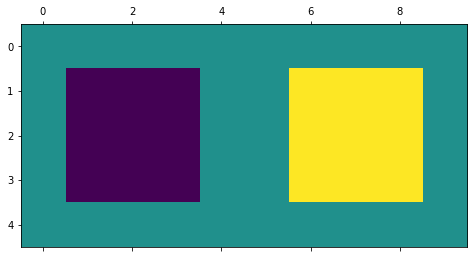

In [6]:
imager(values)

The adjacency is, in this example, the actual neighbors, including corners. 

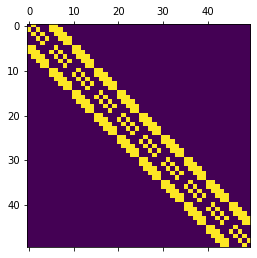

In [7]:
plt.matshow(adj)
plt.show()

Calculating the necessary values, then plotting the G_i Statistic, shows how the similarity to neighbors is calculated per square. 

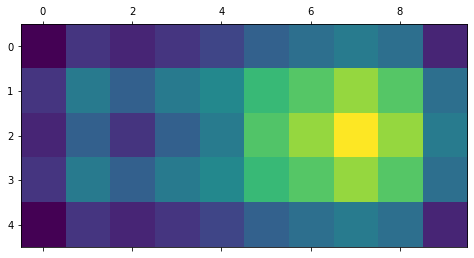

In [8]:
GiD,Wi,EGi,VarG,Z = calc_gi_kth_updated(values,adj)
imager(GiD)

The weights, or number of neighbors within a distance threshold, are used to correct for differences in more or less geographically dense areas. 

In our example, it should highlight the corners, and to a lesser degree, the edges. 

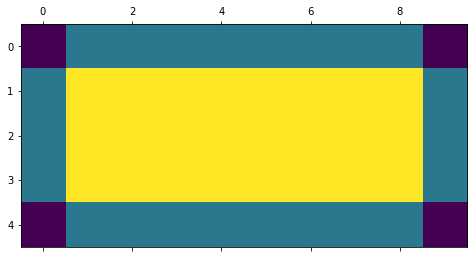

In [9]:
imager(Wi)

The expected values are proportional to the weights, but introduce scaling by dividing weights by $(n-1)$.

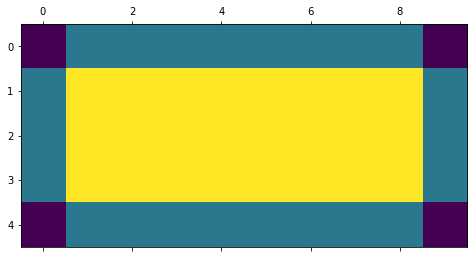

In [10]:
imager(EGi)

The variance can be calculated from the prior values:

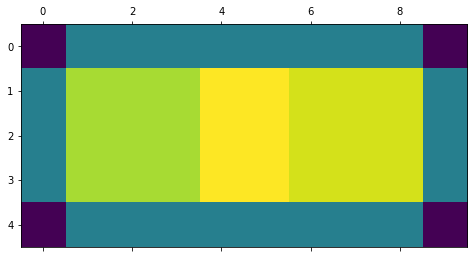

In [11]:
imager(VarG)

And, combining variance with expected values and original inputs, we can examine the z-scores for the observed values:

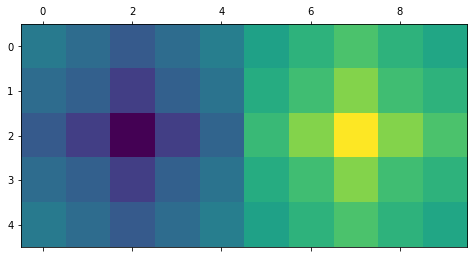

In [12]:
imager(Z)

# Anselin's Moran's I Statistic

Local Indicators of Spatial Autocorrelation use Z scores in place of direct data. 

In [13]:
value_mean = sum(values) / len(values)
value_stdev = (sum([(i-value_mean)**2 for i in values])/len(values))**0.5
z_values = [(i-value_mean) / value_stdev for i in values]

222.22222222222223
[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 8.333333333333334, 13.888888888888891, 8.333333333333334, -0.0, -0.0, 13.888888888888891, 22.22222222222222, 13.888888888888891, -0.0, -0.0, 8.333333333333334, 13.888888888888891, 8.333333333333334, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.333333333333334, 13.888888888888891, 8.333333333333334, 0.0, 0.0, 13.888888888888891, 22.22222222222222, 13.888888888888891, 0.0, 0.0, 8.333333333333334, 13.888888888888891, 8.333333333333334, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


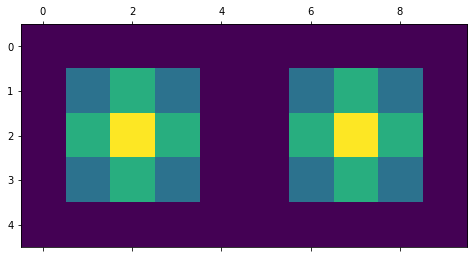

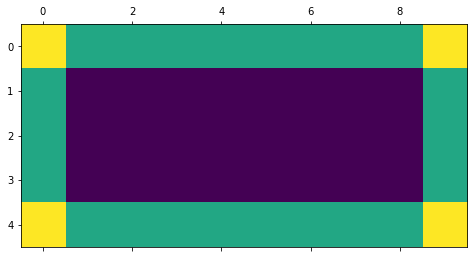

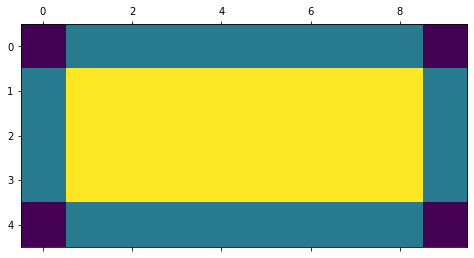

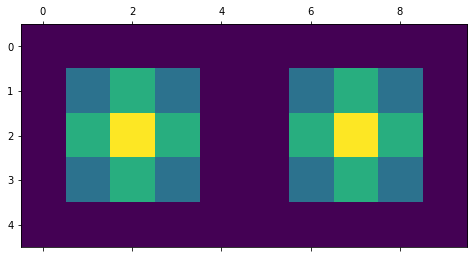

In [14]:
def calc_local_i(z_values, adj):
    I = []
    EI = []
    Var = []
    Z_results = []
    n = len(z_values)
    m2 = 1 # because z normalization is used; otherwise m2 = sum([j**2/n for j in z_values])
    m4 = sum([i**4/n for i in z_values])
    b2 = m4/m2**2
    for i in range(len(z_values)):
        adj_vector = adj[i]
        adj_vector[i] = 0 # explicitly verifying w_{ii} == 0
        z = z_values[i]
        local_i =  (z/m2) *sum([adj_vector[j]*z_values[j] for j in range(n)])
        I.append(local_i)
        wi = sum(adj_vector)
        ei = -wi/(n-1)
        EI.append(ei)
        wi2 = sum([j**2 for j in adj_vector])
        _2wikh = (wi*(wi-1))/2 # n choose 2
        var_i = (wi2*(n-b2))/(n-1) + (_2wikh*(2*b2-n))/((n-1)*(n-2)) - (wi**2)/((n-1)**2)
        Var.append(var_i)
        z_calc = (local_i - ei) / var_i**0.5
        Z_results.append(z_calc)
    return(I, EI, Var, Z_results)


I, EI, Var, Z = calc_local_i(z_values, adj)
print(sum(I))
print(I)
imager(I)
imager(EI)
imager(Var)
imager(Z)


# Geospatial analysis on CBSA data

#### Functions

In [15]:
def filter_dists(dist_df,array,col):
    df_unstacked = dist_df.set_index(col).unstack().reset_index(name='value')
    df_unstacked.columns = [col,'GEOID_2','DISTANCE']
    df_unstacked = df_unstacked[df_unstacked[col].isin(filter_list)]
    df_unstacked = df_unstacked[df_unstacked['GEOID_2'].isin(filter_list)]
    df_restacked = pd.pivot_table(df_unstacked, values = 'DISTANCE',index=col,columns='GEOID_2').reset_index()
    df_restacked.columns = df_restacked.columns.get_level_values(0)
    df_restacked.columns = [col for col in df_restacked.columns.values]
    return df_restacked

In [16]:
def knn_adj_matrix(adj,k):
    adj_matrix = []
    if type(adj) != type([]):
        adj = adj.values.tolist()
    for row in adj:
        threshold = sorted(list(row))[k-1]
        new_row = [1 if i <= threshold else 0 for i in row]
        adj_matrix.append(new_row)
    return adj_matrix

    
def dist_adj_matrix():
    pass

In [17]:
def z_score_array(values):
    value_mean = sum(values) / len(values)
    value_stdev = (sum([(i-value_mean)**2 for i in values])/len(values))**0.5
    z_values = [(i-value_mean) / value_stdev for i in values]
    return z_values

#### Data Import and Preparation

In [18]:
my_path = Path('C:/Users/Jericho/Documents/csi_research/family-geog/data/clean/cbsa')
os.chdir(my_path)
cbsa_summary_df = pd.read_csv('cbsa_summary.csv')

my_path = Path('C:/Users/Jericho/Documents/csi_research/family-geog/data/clean/')
os.chdir(my_path)
cbsa_dists = pd.read_csv('cbsa_dist_matrix.csv')


data_path = Path('C:/Users/Jericho/Documents/csi_research/Dissertation')
os.chdir(data_path)

csa_latlong = pd.read_csv('csa_latlong.csv')
cbsa_latlong = pd.read_csv('2021_Gaz_cbsa_national.txt',sep='\t')
cbsa_latlong.columns = ['CSAFP', 'GEOID', 'NAME', 'CBSA_TYPE', 'ALAND', 'AWATER', 'ALAND_SQMI', 'AWATER_SQMI', 'INTPTLAT','INTPTLONG']
cbsa_latlong = cbsa_latlong[['CSAFP', 'GEOID', 'NAME','INTPTLAT','INTPTLONG']]  

cbsa_regions = pd.read_csv('cbsa-county-region-crosswalk.csv')

cbsa_summary_df.columns = ['GEO'] + cbsa_summary_df.columns.tolist()[1:]

temp_cols = cbsa_dists.columns.tolist()
for i in range(len(temp_cols)):
    try:
        temp_cols[i] = int(temp_cols[i])
    except:
        pass
cbsa_dists.columns = temp_cols

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Jericho/Documents/csi_research/family-geog/data/clean/cbsa'

In [ ]:
cbsa_regions_trunc = cbsa_regions[['CBSA Code','Region','Sub Region']]
cbsa_dists = cbsa_dists.replace(0,np.inf)
filter_list = cbsa_summary_df['GEO'].tolist()
cbsa_dists_filtered = filter_dists(cbsa_dists,filter_list,'GEOID')
cbsa_dists_filtered = cbsa_dists_filtered.set_index('GEOID')
cbsa_dists_filtered

10180    10420    10580    10740    10900    11100    11460    11540  \
GEOID                                                                           
10180      inf  1149.75  1525.84   416.89  1409.35   235.68  1089.70  1040.18   
10420  1149.75      inf   378.19  1358.86   293.62  1137.20   145.65   407.23   
10580  1525.84   378.19      inf  1732.89   162.97  1514.37   476.35   689.23   
10740   416.89  1358.86  1732.89      inf  1644.76   244.68  1261.47  1126.02   
10900  1409.35   293.62   162.97  1644.76      inf  1417.66   424.95   672.39   
...        ...      ...      ...      ...      ...      ...      ...      ...   
49180  1083.27   374.61   587.59  1390.54   427.37  1148.17   485.36   721.74   
49340  1603.02   464.82   105.31  1823.58   199.52  1601.46   573.91   793.39   
49620  1327.56   246.09   250.61  1574.46    91.51  1344.07   388.83   646.98   
49660  1186.79    38.85   340.11  1397.70   255.96  1175.84   175.49   434.89   
49740   788.86  1797.54  2169.94   440.40  2084.60   678.23  1696.33  1544.54   

         11700    12020  ...    48140    48620    48660    48700    49020  \
GEOID                    ...                                                
10180   955.33   915.81  ...  1050.44   399.75   117.37  1346.42  1229.62   
10420   411.41   534.45  ...   491.60   840.47  1037.61   210.33   198.53   
10580   686.51   800.90  ...   759.05  1216.23  1414.69   184.45   340.68   
10740  1270.06  1258.89  ...  1103.87   519.46   443.16  1568.21  1483.90   
10900   532.20   643.05  ...   751.47  1125.31  1301.66    91.15   189.32   
...        ...      ...  ...      ...      ...      ...      ...      ...   
49180   128.95   218.37  ...   805.41   891.18   989.82   420.03   252.80   
49340   729.34   836.88  ...   863.97  1305.29  1493.75   257.66   388.77   
49620   440.70   551.90  ...   729.48  1055.36  1221.44   105.78    99.85   
49660   426.19   549.52  ...   518.32   879.27  1075.01   171.65   177.83   
49740  1703.59  1684.43  ...  1513.08   959.55   851.79  2007.29  1924.29   

         49180    49340    49620    49660    49740  
GEOID                                               
10180  1083.27  1603.02  1327.56  1186.79   788.86  
10420   374.61   464.82   246.09    38.85  1797.54  
10580   587.59   105.31   250.61   340.11  2169.94  
10740  1390.54  1823.58  1574.46  1397.70   440.40  
10900   427.37   199.52    91.51   255.96  2084.60  
...        ...      ...      ...      ...      ...  
49180      inf   619.11   337.13   377.81  1826.08  
49340   619.11      inf   289.89   426.02  2261.91  
49620   337.13   289.89      inf   213.34  2014.79  
49660   377.81   426.02   213.34      inf  1836.39  
49740  1826.08  2261.91  2014.79  1836.39      inf  

[258 rows x 258 columns]

In [ ]:
def knn_adj_matrix(adj,k):
    adj_matrix = []
    if type(adj) != type([]):
        adj = adj.values.tolist()
    for row in adj:
        threshold = sorted(list(row))[k-1]
        new_row = [1 if i <= threshold else 0 for i in row]
        adj_matrix.append(new_row)
    return adj_matrix

adj_matrix = knn_adj_matrix(cbsa_dists_filtered,5)
for i in range(len(adj_matrix)):
    if sum(adj_matrix[i]) > 5:
        print(i,sum(adj_matrix[i]))

In [ ]:
cbsa_feature_df = copy.deepcopy(cbsa_summary_df)
cbsa_feature_df = cbsa_feature_df[['GEO', 'NAME', 'AVG_NHFAMILY_TIME', 'AVG_NHFAMILY_IX',
       'AVG_NHFAMILY_SOCIAL_TIME_RATIO','AVG_TRIP_TO_NHFAMILY_DUR', 'RESP_COUNT']]

for feature in ['AVG_NHFAMILY_TIME', 'AVG_NHFAMILY_IX','AVG_NHFAMILY_SOCIAL_TIME_RATIO','AVG_TRIP_TO_NHFAMILY_DUR','RESP_COUNT']:
    for k in range(1,16):
        #cbsa_feature_df = kth_n_dist(cbsa_feature_df,cbsa_dists_filtered,k)
        adj_matrix = knn_adj_matrix(cbsa_dists_filtered,k)
        vector = cbsa_feature_df[feature].tolist()
        z_vector = z_score_array(vector)
        I, EI, Var, Z = calc_local_i(z_vector, adj_matrix)
        GiD,Wi,EGi,VarG,Z_gi = calc_gi_kth_updated(vector,adj_matrix)
        #print(k,sum(I),sum(GiD))
        string = 'K='+str(k)+'_'+feature
        temp_df = pd.DataFrame(data={string+'_Local_I_Score':I, string+'_Local_I_Z_Score':Z, string+'_Gi_Score':GiD, string+'_Gi_Z_Score':Z_gi})
        cbsa_feature_df = pd.concat([cbsa_feature_df, temp_df],axis=1)


In [ ]:
f = cbsa_feature_df.columns.tolist()
print(f)

['GEO', 'NAME', 'AVG_NHFAMILY_TIME', 'AVG_NHFAMILY_IX', 'AVG_NHFAMILY_SOCIAL_TIME_RATIO', 'AVG_TRIP_TO_NHFAMILY_DUR', 'RESP_COUNT', 'K=1_AVG_NHFAMILY_TIME_Local_I_Score', 'K=1_AVG_NHFAMILY_TIME_Local_I_Z_Score', 'K=1_AVG_NHFAMILY_TIME_Gi_Score', 'K=1_AVG_NHFAMILY_TIME_Gi_Z_Score', 'K=2_AVG_NHFAMILY_TIME_Local_I_Score', 'K=2_AVG_NHFAMILY_TIME_Local_I_Z_Score', 'K=2_AVG_NHFAMILY_TIME_Gi_Score', 'K=2_AVG_NHFAMILY_TIME_Gi_Z_Score', 'K=3_AVG_NHFAMILY_TIME_Local_I_Score', 'K=3_AVG_NHFAMILY_TIME_Local_I_Z_Score', 'K=3_AVG_NHFAMILY_TIME_Gi_Score', 'K=3_AVG_NHFAMILY_TIME_Gi_Z_Score', 'K=4_AVG_NHFAMILY_TIME_Local_I_Score', 'K=4_AVG_NHFAMILY_TIME_Local_I_Z_Score', 'K=4_AVG_NHFAMILY_TIME_Gi_Score', 'K=4_AVG_NHFAMILY_TIME_Gi_Z_Score', 'K=5_AVG_NHFAMILY_TIME_Local_I_Score', 'K=5_AVG_NHFAMILY_TIME_Local_I_Z_Score', 'K=5_AVG_NHFAMILY_TIME_Gi_Score', 'K=5_AVG_NHFAMILY_TIME_Gi_Z_Score', 'K=6_AVG_NHFAMILY_TIME_Local_I_Score', 'K=6_AVG_NHFAMILY_TIME_Local_I_Z_Score', 'K=6_AVG_NHFAMILY_TIME_Gi_Score', 'K=6

AVG_NHFAMILY_TIME


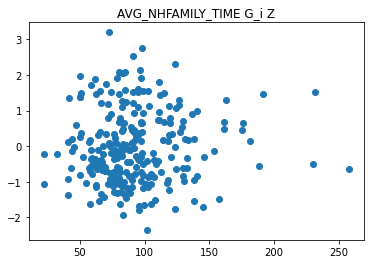

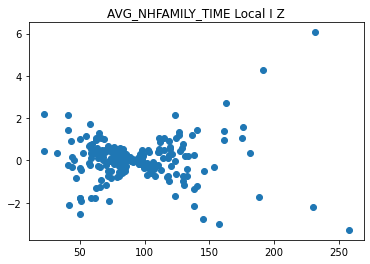

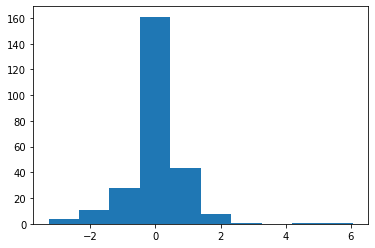

AVG_NHFAMILY_IX


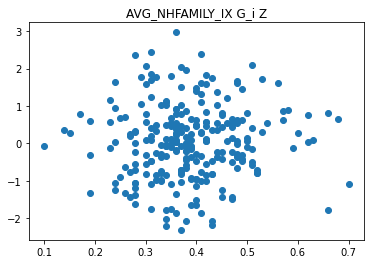

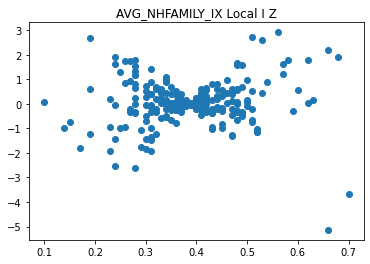

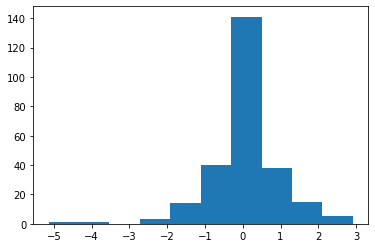

AVG_NHFAMILY_SOCIAL_TIME_RATIO


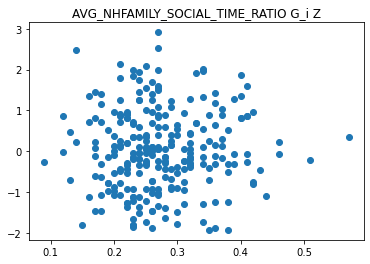

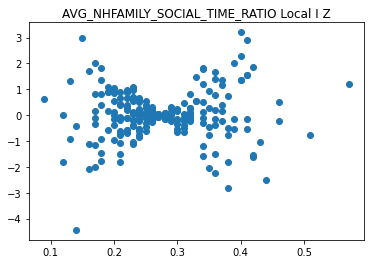

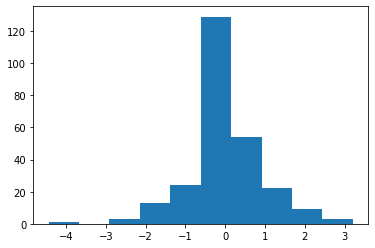

AVG_TRIP_TO_NHFAMILY_DUR


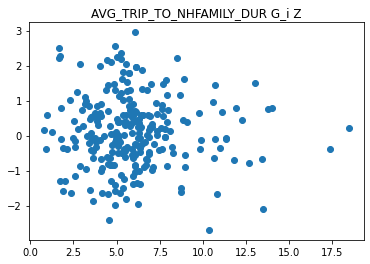

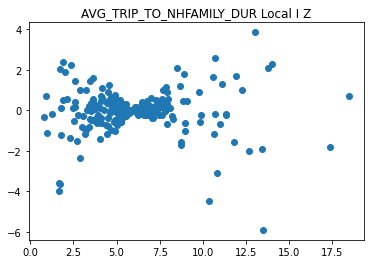

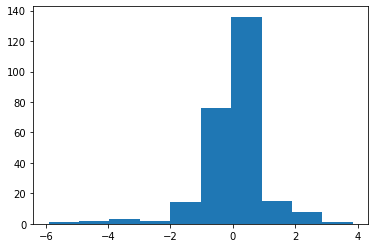

RESP_COUNT


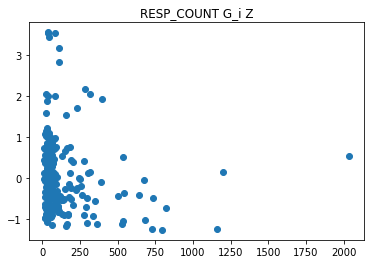

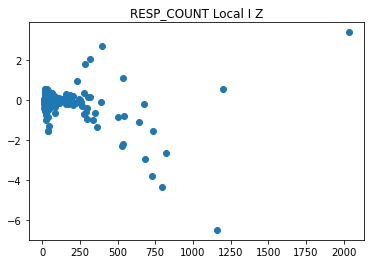

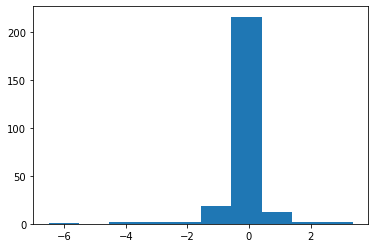

In [ ]:
features = ['AVG_NHFAMILY_TIME', 'AVG_NHFAMILY_IX','AVG_NHFAMILY_SOCIAL_TIME_RATIO','AVG_TRIP_TO_NHFAMILY_DUR','RESP_COUNT']
for col in cbsa_feature_df.columns:
    if col in features:
        print(col)
        x = cbsa_feature_df[col]
        y = cbsa_feature_df['K=8_'+col+'_Gi_Z_Score']
        plt.scatter(x,y)
        plt.title(col+' G_i Z')
        plt.show()
        y = cbsa_feature_df['K=8_'+col+'_Local_I_Z_Score']
        plt.scatter(x,y)
        plt.title(col+' Local I Z')
        plt.show()
        plt.hist(y)
        plt.show()